## Applying ToMe to Stable Diffusion
A quick example showing how to apply ToMe to sd off the shelf

In [1]:
import os
import sys
sys.path.append("/home/blindcrone/webaverse/diffusers/src")
sys.path.append("/home/blindcrone/webaverse/ToMe")
from tome.patch import clip
import torch
from time import time
from sd import sdiff
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
from tome.patch import unet, sdvae
from pytorch_lightning import seed_everything


/usr/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set up stable diffusion
Set up a quick Stable Diffusion instance (this is only slightly modified from ashawkey's implementation from https://github.com/ashawkey/stable-dreamfusion) 

You will need a huggingface token to fetch the underlying models

In [2]:
tokenpath = "/home/blindcrone/webaverse/stable-dreamfusion/TOKEN"
sd = sdiff.StableDiffusion(torch.device('cuda'), tokenpath="/home/blindcrone/webaverse/stable-dreamfusion/TOKEN")

[INFO] loaded hugging face access token from ./TOKEN!
[INFO] loading stable diffusion...
[INFO] loaded stable diffusion!


Go fetch all the underlying models. You'll need a huggingface token for this part

Global seed set to 42


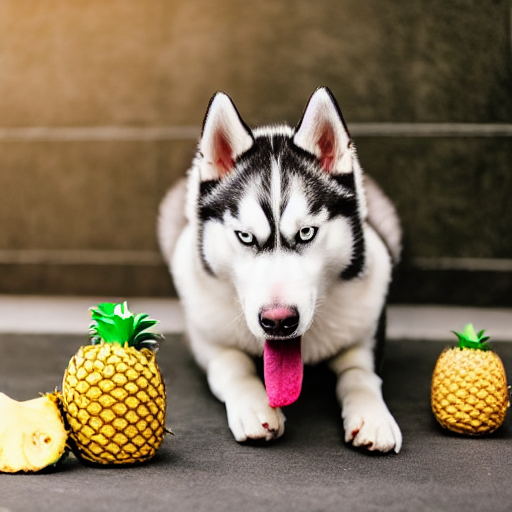

In [3]:
seed_everything(42)
t = time()
i = sd.prompt_to_img("A DSLR photo of a husky dog eating a pineapple", "alaska", num_inference_steps=30)
img = Image.fromarray(i.squeeze())
img

In [4]:
print(time() - t)

5.657402038574219


### Applying ToMe
Simply patch the model after initialization to enable ToMe.

In [5]:
unet.apply_patch(sd.unet)


/home/blindcrone/webaverse/ToMe/tome/merge.py:75: UserWarning: scatter_reduce() is in beta and the API may change at any time. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1550.)
  dst = dst.scatter_reduce(-2, dst_idx.expand(n, r, c), src, reduce=mode)


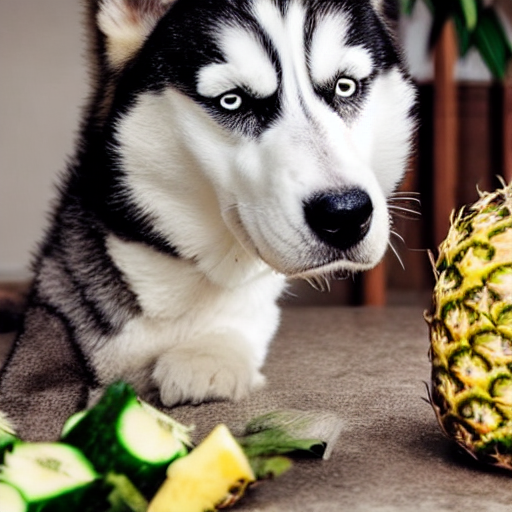

In [6]:
sd.unet.r = 256
t = time()
i = sd.prompt_to_img("A DSLR photo of a husky dog eating a pineapple", "alaska", num_inference_steps=30)
img = Image.fromarray(i.squeeze())
img

Okay cool but maybe with more R?

In [7]:
print(time() - t)

5.132131099700928


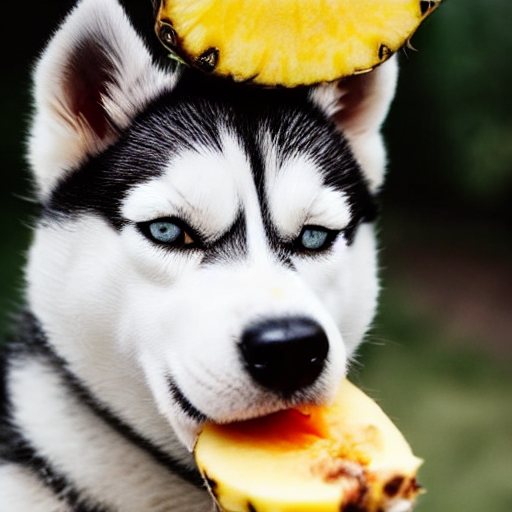

In [8]:
sd.unet.r = 1024
t = time()
i = sd.prompt_to_img("A DSLR photo of a husky dog eating a pineapple", "alaska", num_inference_steps=30)
img = Image.fromarray(i.squeeze())
img

In [9]:
print(time() - t)

4.697687387466431


What about like... a *lot* of R?

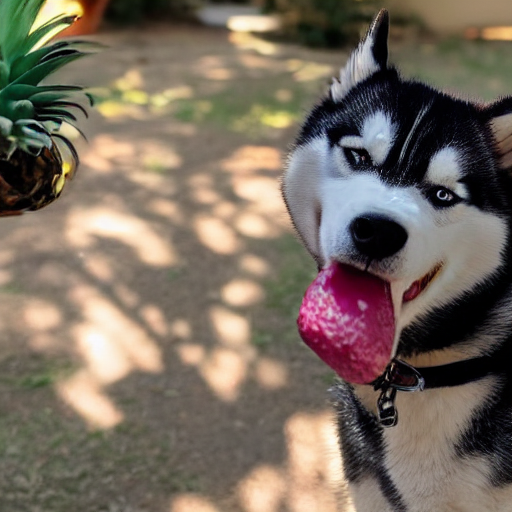

In [10]:
sd.unet.r = 2048
t = time()
i = sd.prompt_to_img("A DSLR photo of a husky dog eating a pineapple", "alaska", num_inference_steps=30)
img = Image.fromarray(i.squeeze())
img

In [11]:
print(time() - t)

4.155938625335693
